In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
bank = pd.read_csv('D:/ExcelR/Data Science/Assignments related/CSV/bank-full (1).csv', sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
bank['y'] = [0 if x == 'no' else 1 for x in bank['y']]

# Assign X as a DataFrame of features and y as a Series of the outcome variable
# axis : {0 or ‘index’, 1 or ‘columns’}, default 0
# Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

X = bank.drop('y', 1) # 1 represents column, we are dropping as we are doing classification
y = bank.y

In [5]:
bank['y'].value_counts()
# 5289 people opened term deposit account and 39922 have not opened the term deposit account

0    39922
1     5289
Name: y, dtype: int64

In [6]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [8]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':# in pandas it is object
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print(X[col_name].value_counts())
        print()

Feature 'job' has 12 unique categories
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Feature 'marital' has 3 unique categories
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Feature 'education' has 4 unique categories
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Feature 'default' has 2 unique categories
no     44396
yes      815
Name: default, dtype: int64

Feature 'housing' has 2 unique categories
yes    25130
no     20081
Name: housing, dtype: int64

Feature 'loan' has 2 unique categories
no     37967
yes     7244
Name: loan, dtype: int64

Feature 'contact' has 3 unique categories
cellular     29285
unknown      13020
telephone     2906
Name: contac

In [9]:
# Create a list of features to dummy
todummy_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome']

In [10]:
# String to append DataFrame column names.

# dummy_na : bool, default False
# Add a column to indicate NaNs, if False NaNs are ignored.

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False) # prefix give name
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [11]:
X = dummy_df(X, todummy_list)
print(X.shape)

(45211, 51)


In [12]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

In [14]:
from sklearn import svm

clf = LogisticRegression()
clf

LogisticRegression()

In [15]:
clf.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
#Prediction using test data
y_pred = clf.predict(X_test)

In [17]:
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.893632707774799


In [18]:
#Predictions
predictions = clf.predict(X_test)

In [19]:
# Imports
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm=confusion_matrix(y_test, predictions)
print(cm)

# New line
print('\n')

# Classification report
print(classification_report(y_test,predictions))

[[12932   270]
 [ 1317   401]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     13202
           1       0.60      0.23      0.34      1718

    accuracy                           0.89     14920
   macro avg       0.75      0.61      0.64     14920
weighted avg       0.87      0.89      0.87     14920



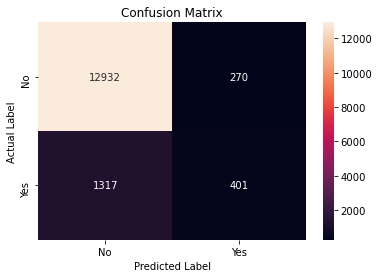

In [20]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
import matplotlib.pyplot as plt
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [21]:
#ROC Curve 
clf.predict_proba(X_test)[:,1]

array([0.09852677, 0.01903676, 0.10499065, ..., 0.02526487, 0.1716035 ,
       0.10418206])

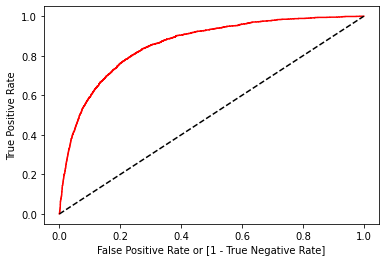

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)
auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [23]:
# area under the curve 
auc

0.6064797481032171